![](./img/dl_banner.jpg)

# Keras深度卷积神经网络
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

在很多复杂的计算机视觉问题上，我们需要使用层次相对较深的卷积神经网络才能得到好结果，但是自己从头去构建卷积神经网络是一个耗时耗力的事情，而且还不一定能训练好。大家通常用到最多的技巧是，使用“预训练好的模型”初始化模型，再在自己的数据集上进行后续处理

## Keras预训练模型
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)
keras有很多预训练模型，具体的可以在[keras预训练模型](https://github.com/keras-team/keras/tree/master/keras/applications)中查看到：

- VGG16
- VGG19
- ResNet50
- Inception v3
- Xception
- ...
我们来使用其中比较有名的一些模型演示一下预训练模型的使用方法，下面是来自牛津的著名模型VGG

### VGG16

<img src="./img/vgg16.png" >

### VGG19

<img src="./img/vgg19.png" heigth="10%" />

### 从`keras.applications`中导入预训练模型

In [1]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

默认下载的模型`HDF5`文件会被存储在`~/.keras/models/`

### 使用预训练模型预估

In [3]:
IMAGENET_FOLDER = 'img/imagenet'  #in the repo

In [4]:
!ls img/imagenet

apricot_565.jpeg  apricot_787.jpeg	strawberry_1174.jpeg
apricot_696.jpeg  strawberry_1157.jpeg	strawberry_1189.jpeg


<img src="./img/imagenet/strawberry_1157.jpeg" width="40%" />

In [5]:
!wget https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
!mv imagenet_class_index.json ~/.keras/models/

from keras.preprocessing import image
import numpy as np

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

--2018-11-05 02:04:16--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.108.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: 'imagenet_class_index.json'

imagenet_class_inde 100%[===================>]  34.53K   215KB/s    in 0.2s    

2018-11-05 02:04:17 (215 KB/s) - 'imagenet_class_index.json' saved [35363/35363]

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07745940', 'strawberry', 0.9857027), ('n07836838', 'chocolate_sauce', 0.0051280526), ('n04332243', 'strainer', 0.003665665), ('n07614500', 'ice_cream', 0.0021994396), ('n04476259', 'tray', 0.0011691322)]]


<img src="./img/imagenet/apricot_696.jpeg" width="40%" />

In [6]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_696.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07747607', 'orange', 0.841503), ('n07749582', 'lemon', 0.053846974), ('n07717556', 'butternut_squash', 0.017796772), ('n03937543', 'pill_bottle', 0.015318968), ('n07720875', 'bell_pepper', 0.008361504)]]


<img src="./img/imagenet/apricot_565.jpeg" width="40%" />

In [7]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_565.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.37633196), ('n07716358', 'zucchini', 0.25885594), ('n07711569', 'mashed_potato', 0.04936721), ('n07716906', 'spaghetti_squash', 0.03363548), ('n12144580', 'corn', 0.03145728)]]


# Residual Networks
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

<img src="./img/resnet_bb.png" >

## ResNet 50
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

<img src="./img/resnet34.png" >

In [8]:
from keras.applications import ResNet50

A ResNet is composed by two main blocks: **Identity Block** and the **ConvBlock**.

* IdentityBlock is the block that has no conv layer at shortcut
* ConvBlock is the block that has a conv layer at shortcut

In [9]:
from keras.applications.resnet50 import identity_block, conv_block

In [10]:
identity_block??

In [11]:
conv_block??

---

### 可视化CNN的卷积核
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [12]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

In [13]:
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
# 图像尺寸
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [15]:
from keras.applications import vgg16

# 加载去除头部softmax的VGG权重
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

58892288/58889256 [==============================] - 76s 1us/step
Model loaded.


In [16]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
from collections import OrderedDict
layer_dict = OrderedDict()
# 为了方便，我们存储下模型层次名称和具体层次的对应
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

### 测试图片

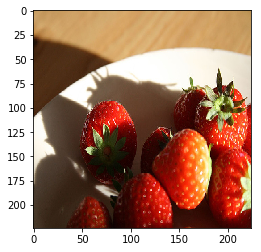

In [18]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


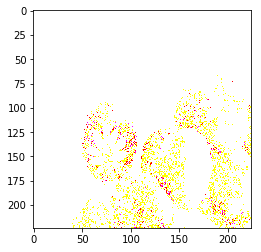

In [22]:
input_img_data = image.img_to_array(img)
#input_img_data /= 255
plt.imshow(input_img_data)

In [23]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


### 取出中间层次进行可视化
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [24]:
## 定义函数取出中间层次的输出结果
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

In [25]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [26]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

In [27]:
layer.filters  # 卷积核的个数

64

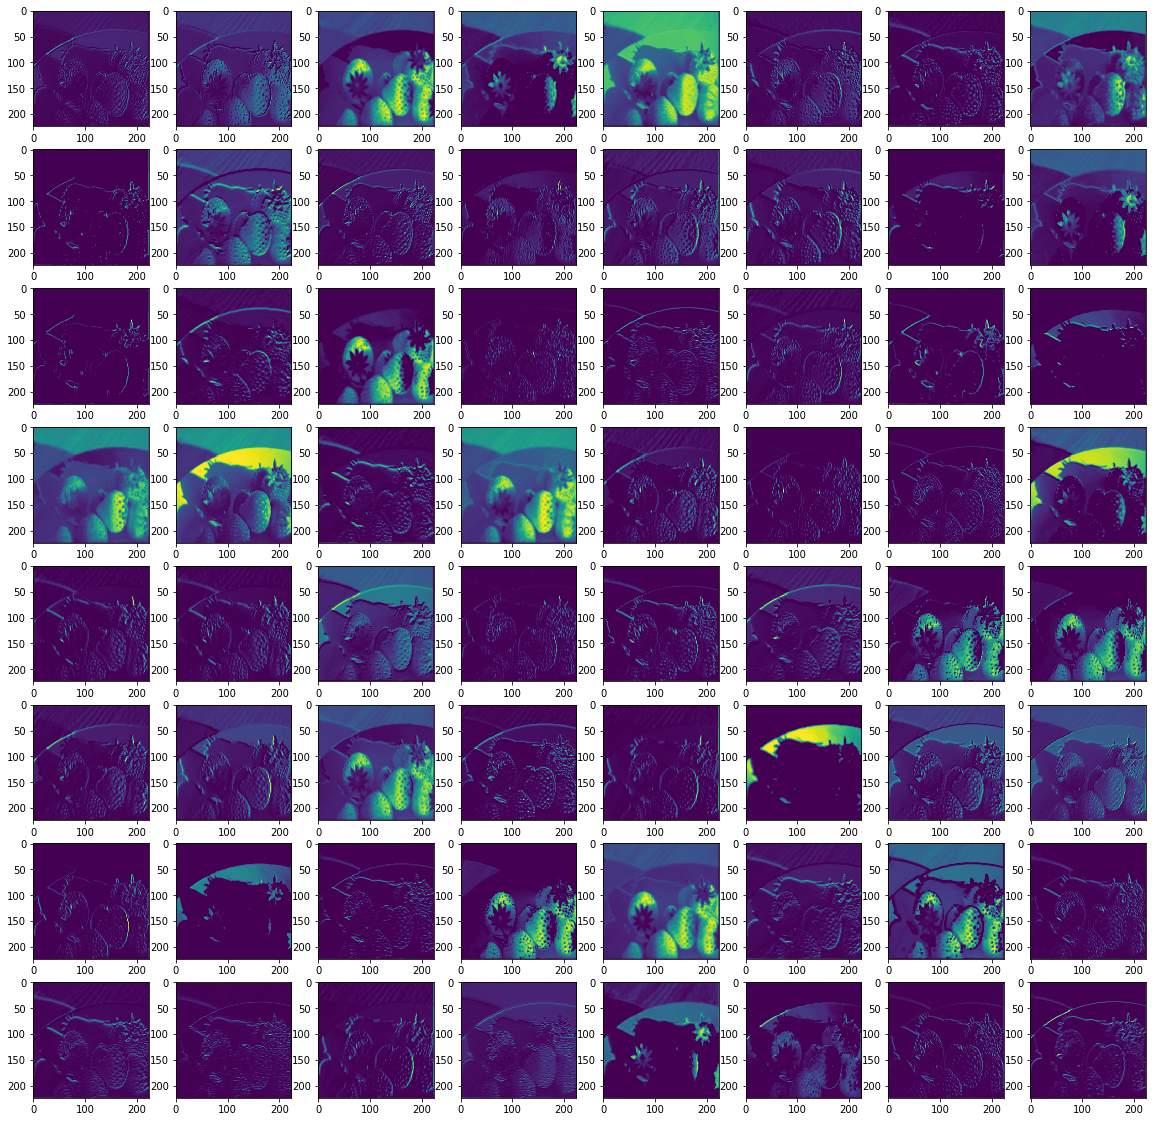

In [28]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [29]:
conv_img_mean = np.mean(activated_img, axis=2)

In [30]:
conv_img_mean.shape

(224, 224)

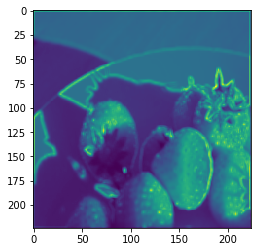

In [31]:
plt.imshow(conv_img_mean)

### 可视化`block5_conv2` 层的权重
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

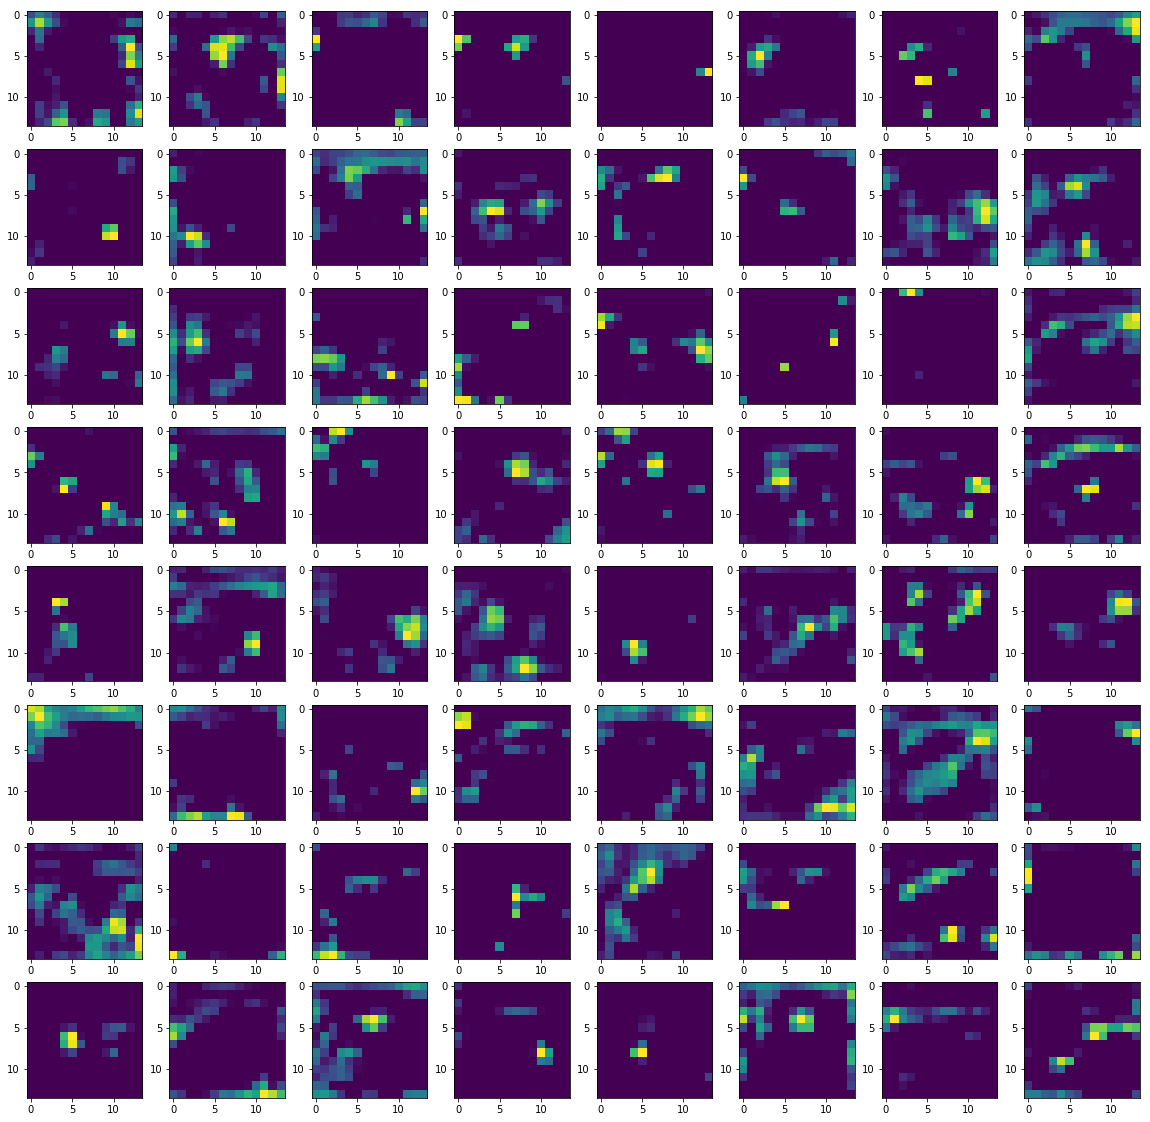

In [32]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

### 版权归 © 稀牛学院 所有 保留所有权利
![](./img/xiniu_neteasy.png)